# 01 유효한 팰린드롬
---
주어진 문자열이 팰린드롬인지 확인하라. 대소문자를 구분하지 않으며, 영문자와 숫자만을 대상으로 한다.

팰린드롬 : 앞뒤가 똑같은 단어나 문장.. 기러기 스위스 인도인 토마토 별똥별 우영우 

예제1) "A man, a plan, a canal: Panama" 

출력) True


예제2) "race a car"

출력) False


## # 풀이 1. 리스트로 변환

- 직접 문자열을 입력받아 팰린드롬 여부를 판별해본다
- 대소문자 여부를 구분하지 않음
- 영문자, 숫자만을 대상으로 한다
- 이 부분에 대한 전처리부터 구현

In [ ]:
# isalnum, lower 로 전처리
s = "A man, a plan, a canal: Panama"
strs = []
for char in s:
    if char.isalnum():
        strs.append(char.lower())

- `isalnum()` : 영문자, 숫자 여부를 판별하는 함수, 이를 이용해 해당하는 문자만 추가한다
- `lower()` : 모두 소문자로 변환

In [ ]:
print(strs)

['a', 'm', 'a', 'n', 'a', 'p', 'l', 'a', 'n', 'a', 'c', 'a', 'n', 'a', 'l', 'p', 'a', 'n', 'a', 'm', 'a']


In [ ]:
def isPalindrome(s:str) -> bool:
    strs =[]
    for char in s:
        if char.isalnum():
            strs.append(char.lower())

    # 팰린드롬인지 판별
    while len(strs) > 1:
        if strs.pop(0) != strs.pop(): 
            return False
    
    return True

- `pop(0)` : 리스트의 첫번째 요소 추출
- `pop()` : 리스트이 마지막 요소 추출

In [ ]:
s = "A man, a plan, a canal: Panama"
isPalindrome(s)

True

- 240 ms

## # 풀이 2. 데크 자료형을 이용한 최적화

- 리스트만으로도 문제 해결은 가능하지만, 데크(Deque)를 명시적으로 선언하면 좀 더 속도를 높일 수 있음
- 풀이 1 은 실행에 304밀리초가 소요됨
- 데크를 변경해서 개선해보자

In [ ]:
import collections

def isPalindrome(s:str) -> bool:
    # 자료형 데크로 선언
    strs = collections.deque()

    for char in s:
        if char.isalnum():
            strs.append(char.lower())

    # 팰린드롬인지 판별
    while len(strs) > 1:
        if strs.popleft() != strs.pop(): # 데크는 popleft!
            return False
        
    return True

In [ ]:
s = "A man, a plan, a canal: Panama"

isPalindrome(s)

True

In [ ]:
import collections

strs = collections.deque()
s = "A man, a plan, a canal: Panama"

for char in s:
    if char.isalnum():
        strs.append(char.lower())

In [ ]:
print(strs)

deque(['a', 'm', 'a', 'n', 'a', 'p', 'l', 'a', 'n', 'a', 'c', 'a', 'n', 'a', 'l', 'p', 'a', 'n', 'a', 'm', 'a'])


- 63 ms 
- 240 -> 63 으로 줄었음
- 왜냐면 리스트 pop(0) 은 O(n), 데크의 popleft() 는 O(1) 이라서

## # 풀이 3. 슬라이싱 사용

- 슬라이싱을 사용한 문제 풀이

In [ ]:
import re

def isPalindrome(s:str) -> bool:
    s = s.lower()
    # 정규식으로 불필요한 문자 필터링
    s = re.sub('[^a-z0-9]', '', s) # -> s 안에서 소문자, 숫자가 아닌 것을 찾아서 ''로 대체하라, 즉 삭제
    return s == s[::-1] # 슬라이싱

In [ ]:
s = "A man, a plan, a canal: Panama"

isPalindrome(s)

True

- `re.sub(패턴, 바꿀데이터, 원본데이터)` : 특정 패턴이 매칭되는 것을 찾아서, 다른 문자열로 바꾸기
- `s[::-1]` : 문자열 뒤집음
- 40 ms 걸림 


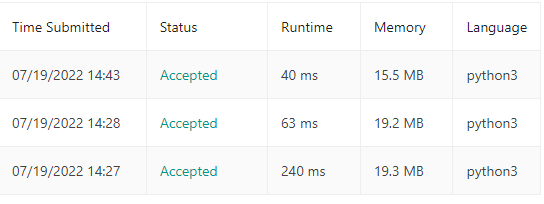

### [문자열 슬라이싱]

- 내부적으로 빠르게 동작함
- 문자열을 조작할 대는 항상 슬라이싱을 우선으로 사용하는 것이 속도 개선에 유리함
- 안녕하세요는 [0, 1, 2, 3, 4] , 뒤에서부터 [-5, -4, -3, -2, -1]  

In [ ]:
s = '안녕하세요'
print(s[1:4]) # 인덱스 1에서 4 이전까지, 4는 포함 안함

녕하세


In [ ]:
print(s[1:-2]) # 인덱스 1에서 -2 이전까지, -2 포함 안함

녕하


In [ ]:
print(s[1:]) # 1에서부터 끝까지

녕하세요


In [ ]:
print(s[:]) # 둘 다 생략하면 사본 리턴

안녕하세요


In [ ]:
print(s[1:100]) # 문자열의 최대 길이만큼만 표현됨

녕하세요


In [ ]:
print(s[-1])

요


In [ ]:
print(s[-4])

녕


In [ ]:
print(s[:-3])

안녕


In [ ]:
print(s[::1]) # 1은 기본값으로 동일함

안녕하세요


In [ ]:
print(s[::-1]) # 뒤집기

요세하녕안


In [ ]:
print(s[::2]) # 2칸씩 앞으로 이동

안하요
